<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/current_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [15]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:

import subprocess

# Run the shell command and capture the output
result = subprocess.run("ls -t drive/MyDrive/weather/*.csv | head -1", shell=True, stdout=subprocess.PIPE, text=True)

# Get the name of the file
filename = result.stdout.strip()

print("Using file ", filename)

Using file  drive/MyDrive/weather/paphos2024-08-29.csv


In [17]:
import pandas as pd

df=pd.read_csv(filename,usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])


df.set_index('datetime', inplace=True)
save=df

df=df.last('7D')

<ipython-input-17-2986f83af4fc>:9: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df=df.last('7D')


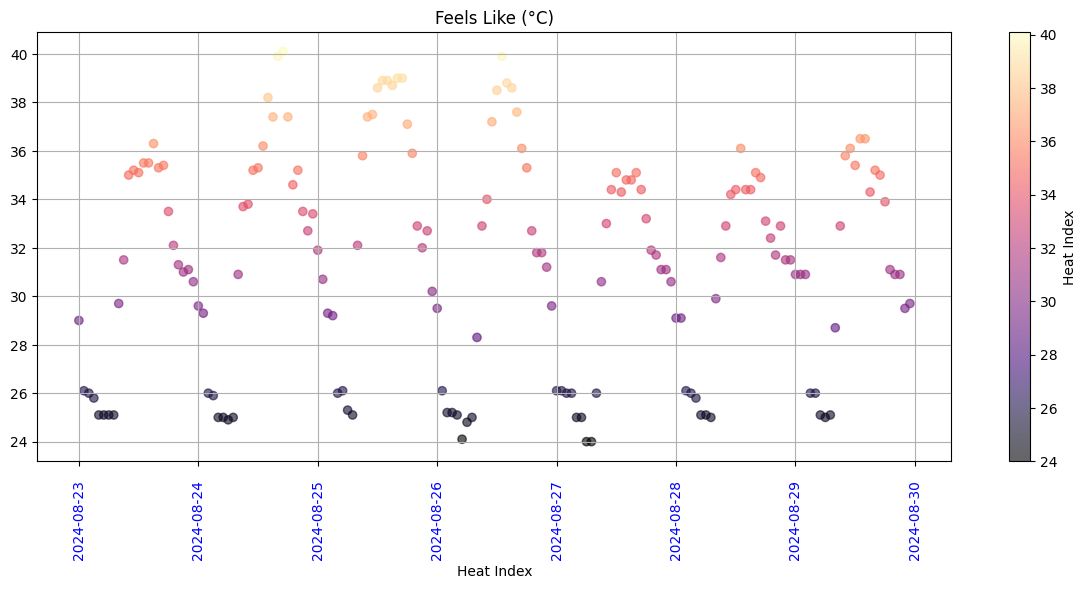

In [18]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'], cmap='magma', alpha=0.6)

plt.title('Feels Like (°C)')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))



plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

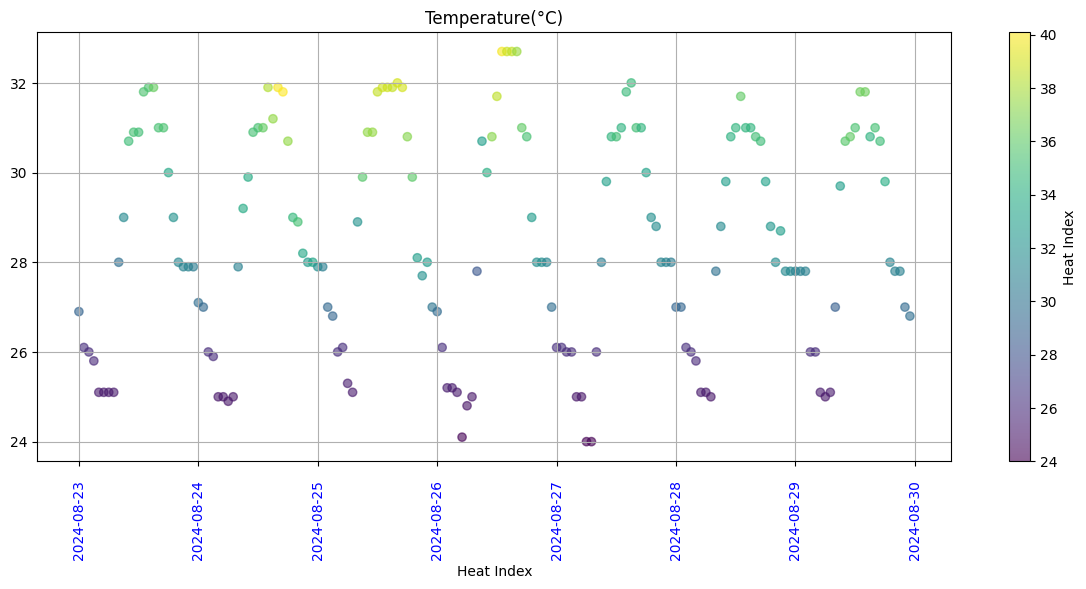

In [19]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['temp'], c=df['feelslike'], cmap='viridis', alpha=0.6)

plt.title('Temperature(°C)')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))



plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))


# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)
# ax.tick_params(axis='x', which='major', pad=15)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

In [20]:
df

,temp,feelslike,humidity
datetime,,,
2024-08-23 00:00:00,26.9,29.0,73.63
2024-08-23 01:00:00,26.1,26.1,73.95
2024-08-23 02:00:00,26.0,26.0,74.50
2024-08-23 03:00:00,25.8,25.8,75.56
2024-08-23 04:00:00,25.1,25.1,78.42
...,...,...,...
2024-08-29 19:00:00,28.0,31.1,74.29
2024-08-29 20:00:00,27.8,30.9,74.87
2024-08-29 21:00:00,27.8,30.9,74.87
